# Ungraded Lab: Beyond Hello World, A Computer Vision Example

In the previous exercise, you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function <code>y=2x-1</code> directly instead of bothering with using machine learning to learn the relationship between <code>x</code> and <code>y</code>.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where you will build a neural network to recognize different items of clothing, trained from a dataset containing 10 different types.

## Start Coding

Let's start with our import of TensorFlow.

In [1]:
import tensorflow as tf

print(tf.__version__)

2.6.2


The Fashion MNIST dataset is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

| Label | Description en | Description fr |
| --- | ----------- | ------------ |
| 0 | T-shirt/top | Tee-shirt / haut |
| 1 | Trouser | Pantalon |
| 2 | Pullover | Arrêtez-vous |
| 3 | Dress | Robe |
| 4 | Coat | Manteau |
| 5 | Sandal | Sandale |
| 6 | Shirt | Chemise |
| 7 | Sneaker | Basket |
| 8 | Bag | Sac |
| 9 | Ankle boot | Bottine |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

Calling <code>load_data()</code> on this object will give you two tuples with two lists each. These will be the training and testing values for the graphics that contain the clothing items and their labels.

In [3]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

What does these values look like? Let's print a training image (both as an image and a numpy array), and a training label to see. Experiment with different indices in the array. For example, also take a look at index <code>42</code>. That's a different boot than the one at index <code>0</code>.

Label: 7

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1   0 

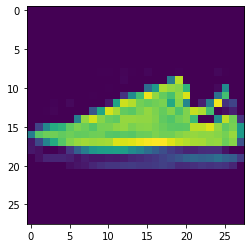

In [13]:
import numpy as np 
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 6

# Set number of caracters pers row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'Label: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called normalization and fortunately in Python, it's easy to normalize an array without looping. You do it like this:

In [14]:
# Normalize the pixel values of the train and test images
training_images = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why the dataset is split into two: training and testing? Remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data that the model hasn't yet seen. This will be used to evaluate how good it would be at classifying values.

Let's now design the model. There's quite a few new concepts here. But don't worry, you'll get the hang of them.

In [15]:
# Build the classification model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons need an [activation](https://keras.io/api/layers/activations/) function to tell them what to do. There are a lot of options, but just use these for now:

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;if x > 0: 

 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;return x

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;else: 

  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;return 0

In other words, it it only passes values 0 or greater to the next layer in the network.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at <code>index = 4</code> means that the model is most confident that the input clothing image is a coat. If it is at <code>index = 5</code>, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM) if you want to know more about the Softmax function and how the values are computed.

In [18]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


The next thing to do, now that the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling <code>model.fit()</code> asking it to fit your training data to your training labels. It will figure out the relationship between the training data and its actual labels so in the future if you have inputs that looks like the training data, then it can predict what the label for that input is.

In [19]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4970 - accuracy: 0.8240
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3743 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3329 - accuracy: 0.8784
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3096 - accuracy: 0.8855
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2924 - accuracy: 0.8921


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like <code>0.9098</code>. This tells you that your neural network is about <code>91%</code> accurate in classifying the training data. That is, it figured out a pattern match between the image and the labels that worked <code>91%</code> of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images and labels. We can call <code>model.evaluate()</code> with this test dataset as inputs and it will report back the loss and accuracy of the model. Let's give it a try:

In [20]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3695 - accuracy: 0.8661


[0.3695196509361267, 0.866100013256073]

You can expect the accuracy here to be about 0.88 which means it was <code>88%</code> accurate on the entire test set. As expected, it probably would not do as well with unseen data as it did with data it was trained on! As you go through this course, you'll look at ways to improve this.

## Exploration Exercises
To explore further and deepen your understanding, try the below exercises:

### Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent?

In [54]:
classifications = model.predict(test_images)
y_pred = np.argmax(classifications[0])
print(y_pred)

9


Hint: try running <code>print(test_labels[0])</code> -- and you'll get a <code>**9**</code>. Does that help you understand why this list looks the way it does?

In [55]:
print(test_labels[0])

9


### E1Q1: What does this list represent?
1. It's 10 random meaningless values
2. It's the first 10 classifications that the computer made
3. It's the probability that this item is each of the 10 classes

Click for Answer

\#\#\#\# Answer: The correct answer is (3) The output of the model is a list of 10 numbers. These numbers are a probability that the value being classified is the corresponding value (https://github.com/zalandoresearch/fashion-mnist#labels), i.e. the first value in the list is the probability that the image is of a '0' (T-shirt/top), the next is a '1' (Trouser) etc. Notice that they are all VERY LOW probabilities. For index 9 (Ankle boot), the probability was in the 90's, i.e. the neural network is telling us that the image is most likely an ankle boot.

In [26]:
classifications[0]

array([2.60362799e-06, 2.00053293e-07, 1.11529864e-07, 2.55114019e-09, 7.46010542e-08, 8.44363030e-03, 1.48114873e-06, 9.70967337e-02, 1.60263971e-05, 8.94439220e-01], dtype=float32)

In [49]:
[i for i in np.random.randn(1, 10)]

[array([-0.40083248,  0.12456637, -0.66511196, -0.6300224 ,  0.57988153, -0.83752972,  1.41981952, -0.30977229, -0.99381127,  0.13515864])]